In [6]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib.pyplot
import pandas as pd
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score


# Import training data
training_data = pd.read_csv('steel.csv')
X_training = training_data[['normalising_temperature', 'tempering_temperature', 'percent_silicon', 'percent_chromium', 'percent_copper', 
                            'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese']]
Y_training = training_data['tensile_strength']
# print(X_training)
# print(Y_training)


# Scatter plot: of every line
"""
plot_training = X_training.rename(columns={
    'normalising_temperature': 'normalising temp',
    'tempering_temperature': 'tempering temp',
    'percent_silicon': '% silicon',
    'percent_chromium': '% chromium',
    'percent_copper': '% copper',
    'percent_nickel': '% nickel',
    'percent_sulphur': '% sulphur',
    'percent_carbon': '% carbon',
    'percent_manganese': '% manganese',
})

pd.plotting.scatter_matrix(
    plot_training[['normalising temp', 'tempering temp', '% silicon', 
                '% chromium', '% copper', '% nickel', 
                '% sulphur', '% carbon', '% manganese']],
    figsize=(20, 20),
    diagonal='kde'   # histogram or kde on the diagonal
)
plt.savefig("scatter_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
"""

# Choose error metrics:
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
}

# List to collect results
results_list = []
results_list_split = []

depth = [None, 3, 5, 7, 9]
samples_to_split = [2,3,4,5,6]

for d in depth:
    # Train our model with the training data
    regressor = DecisionTreeRegressor(random_state=0, max_depth=d)
    
    # Set up 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    results = cross_validate(regressor, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
    
    # Store results in a dict
    results_list.append({
        "max_depth": d,
        "Avg Train R2": results['train_r2'].mean(),
        "Avg Test R2": results['test_r2'].mean(),
        "Avg Train MSE": -results['train_mse'].mean(),   # convert to positive
        "Avg Test MSE": -results['test_mse'].mean()
    })

# Create the DataFrame
results_df = pd.DataFrame(results_list)
print(results_df)

for s in samples_to_split:
    # Train our model with the training data
    regressor = DecisionTreeRegressor(random_state=0, min_samples_split=s)
    
    # Set up 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    results = cross_validate(regressor, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
    
    # Store results in a dict
    results_list_split.append({
        "min_samples_split": s,
        "Avg Train R2": results['train_r2'].mean(),
        "Avg Test R2": results['test_r2'].mean(),
        "Avg Train MSE": -results['train_mse'].mean(),   # convert to positive
        "Avg Test MSE": -results['test_mse'].mean()
    })

# Create the DataFrame
results_split_df = pd.DataFrame(results_list_split)
print(results_split_df)

#Now combine them

results_list_total = []

for d in depth:
    for s in samples_to_split:
        # Train our model with the training data
        regressor = DecisionTreeRegressor(random_state=0, max_depth=d, min_samples_split=s)
        
        # Set up 10-fold cross-validation
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        results = cross_validate(regressor, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
        
        # Store results in a dict
        results_list_total.append({
            "max_depth": d,
            "min_split": s,
            "Avg Train R2": round(results['train_r2'].mean(),3),
            "Avg Test R2": round(results['test_r2'].mean(),3),
            "Avg Train MSE": round(-results['train_mse'].mean(),3),   # convert to positive
            "Avg Test MSE": round(-results['test_mse'].mean(),3)
        })

# Create the DataFrame
results_total = pd.DataFrame(results_list_total)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print(results_total)

   max_depth  Avg Train R2  Avg Test R2  Avg Train MSE  Avg Test MSE
0        NaN      1.000000     0.836830   7.785962e-30   1338.402821
1        3.0      0.627589     0.541194   3.085552e+03   3703.025204
2        5.0      0.828554     0.734102   1.419969e+03   2119.158214
3        7.0      0.925080     0.788277   6.203361e+02   1696.785777
4        9.0      0.970724     0.836182   2.420654e+02   1338.424835
   min_samples_split  Avg Train R2  Avg Test R2  Avg Train MSE  Avg Test MSE
0                  2      1.000000     0.836830   7.785962e-30   1338.402821
1                  3      0.996342     0.840239   3.030147e+01   1305.278580
2                  4      0.992238     0.827729   6.432489e+01   1412.508982
3                  5      0.987015     0.833296   1.076485e+02   1383.132585
4                  6      0.980710     0.841549   1.598003e+02   1305.328790
    max_depth  min_split  Avg Train R2  Avg Test R2  Avg Train MSE  Avg Test MSE
0         NaN          2         1.000     

In [5]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib.pyplot
import pandas as pd
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import KFold, cross_validate
from sklearn.gaussian_process.kernels import RationalQuadratic, DotProduct
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

# Import training data
training_data = pd.read_csv('steel.csv')
X_training = training_data[['normalising_temperature', 'tempering_temperature', 'percent_silicon', 'percent_chromium', 'percent_copper', 
                            'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese']]
Y_training = training_data['tensile_strength']

# Choose error metrics:
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
}

# List to collect results
results_list = []
results_list_alpha = []

#Default kernel (None) uses RBF

kernels = [
    # RBF
    None,
    # RationalQuadratic
    1.0 * RationalQuadratic(),
    # Sinusoidal
    1.0 * DotProduct()
]
alpha = [0.00001, 0.1, 1, 10, 100]

for k in kernels:
    # Train our model with the training data
    regressor = GaussianProcessRegressor(random_state=0, kernel=k)

    #If you remove model and put in regressor instead u get what happens with no normalization
    model = make_pipeline(StandardScaler(), regressor)

    # Set up 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    results = cross_validate(model, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
    
    # Store results in a dict
    results_list.append({
        "Kernel": k,
        "Avg Train R2": results['train_r2'].mean(),
        "Avg Test R2": results['test_r2'].mean(),
        "Avg Train MSE": -results['train_mse'].mean(),   # convert to positive
        "Avg Test MSE": -results['test_mse'].mean()
    })

# Create the DataFrame
results_df = pd.DataFrame(results_list)
print(results_df)

for a in alpha:
     # Train our model with the training data
    regressor = GaussianProcessRegressor(random_state=0, alpha=a)
    
    model = make_pipeline(StandardScaler(), regressor)

    # Set up 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    results = cross_validate(model, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
    
    # Store results in a dict
    results_list_alpha.append({
        "Alpha": a,
        "Avg Train R2": results['train_r2'].mean(),
        "Avg Test R2": results['test_r2'].mean(),
        "Avg Train MSE": -results['train_mse'].mean(),   # convert to positive
        "Avg Test MSE": -results['test_mse'].mean()
    })

# Create the DataFrame
results_alpha_df = pd.DataFrame(results_list_alpha)
print(results_alpha_df)

#Now combine them

results_list_total = []

for k in kernels:
    for a in alpha:
        # Train our model with the training data
        regressor = GaussianProcessRegressor(random_state=0, alpha=a, kernel=k)
        
        model = make_pipeline(StandardScaler(), regressor)
    
        # Set up 10-fold cross-validation
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        results = cross_validate(model, X_training, Y_training, cv=kf, scoring=scoring, return_train_score=True)
        
        # Store results in a dict
        results_list_total.append({
            "Kernel": k,
            "Alpha": a,
            "Avg Train R2": results['train_r2'].mean(),
            "Avg Test R2": results['test_r2'].mean(),
            "Avg Train MSE": -results['train_mse'].mean(),   # convert to positive
            "Avg Test MSE": -results['test_mse'].mean()
        })

# Create the DataFrame
results_total = pd.DataFrame(results_list_total)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print(results_total)

C:\Users\bikep\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\bikep\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\bikep\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.


                                              Kernel  Avg Train R2  Avg Test R2  Avg Train MSE  Avg Test MSE
0                                               None      1.000000     0.366035   3.280453e-12   5131.829059
1  1**2 * RationalQuadratic(alpha=1, length_scale=1)      1.000000     0.845785   1.264524e-20   1250.262076
2                       1**2 * DotProduct(sigma_0=1)      0.803355     0.786725   1.629552e+03   1706.959673
       Alpha  Avg Train R2  Avg Test R2  Avg Train MSE  Avg Test MSE
0    0.00001      0.999997     0.396505       0.021325   4874.963686
1    0.10000      0.981929     0.438394     149.759733   4508.193431
2    1.00000      0.713034     0.096131    2378.106401   7309.073584
3   10.00000     -1.077047    -1.502362   17215.249949  20419.929256
4  100.00000     -3.662785    -3.839901   38647.083037  39368.414765


C:\Users\bikep\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\bikep\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\bikep\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.


                                               Kernel      Alpha  Avg Train R2  Avg Test R2  Avg Train MSE  Avg Test MSE
0                                                None    0.00001      0.999997     0.396505   2.132492e-02   4874.963686
1                                                None    0.10000      0.981929     0.438394   1.497597e+02   4508.193431
2                                                None    1.00000      0.713034     0.096131   2.378106e+03   7309.073584
3                                                None   10.00000     -1.077047    -1.502362   1.721525e+04  20419.929256
4                                                None  100.00000     -3.662785    -3.839901   3.864708e+04  39368.414765
5   1**2 * RationalQuadratic(alpha=1, length_scale=1)    0.00001      1.000000     0.880091   1.578418e-12    979.385425
6   1**2 * RationalQuadratic(alpha=1, length_scale=1)    0.10000      1.000000     0.880181   1.543847e-04    978.809458
7   1**2 * RationalQuadratic(alp

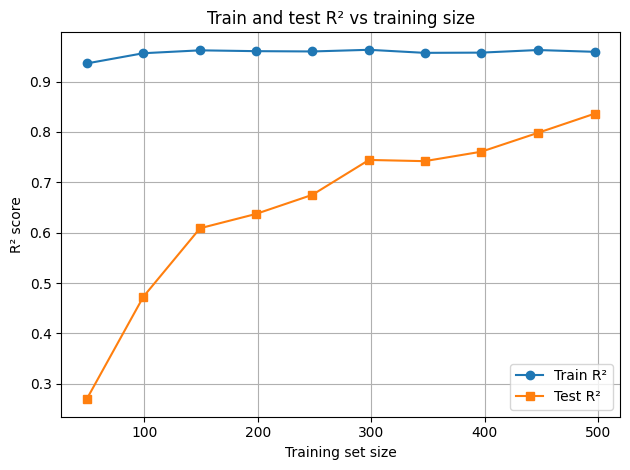

In [9]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib.pyplot
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score


# Import training data
training_data = pd.read_csv('steel.csv')
X_training = training_data[['normalising_temperature', 'tempering_temperature', 'percent_silicon', 'percent_chromium', 'percent_copper', 
                            'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese']]
Y_training = training_data['tensile_strength']
# print(X_training)
# print(Y_training)

# Choose error metrics:
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
}

depth = [None, 3, 5, 7, 9]
samples_to_split = [2,3,4,5,6]

# Train our model with the training data
regressor = DecisionTreeRegressor(random_state=0, max_depth=9, min_samples_split=6)
model = make_pipeline(StandardScaler(), regressor)
kf = KFold(n_splits=10, shuffle=True, random_state=0)

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_training,
    Y_training,
    cv=kf,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=0
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, marker='o', label="Train R²")
plt.plot(train_sizes, test_mean, marker='s', label="Test R²")

plt.xlabel("Training set size")
plt.ylabel("R² score")
plt.title("Train and test R² vs training size")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\bikep\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\bikep\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\bikep\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:

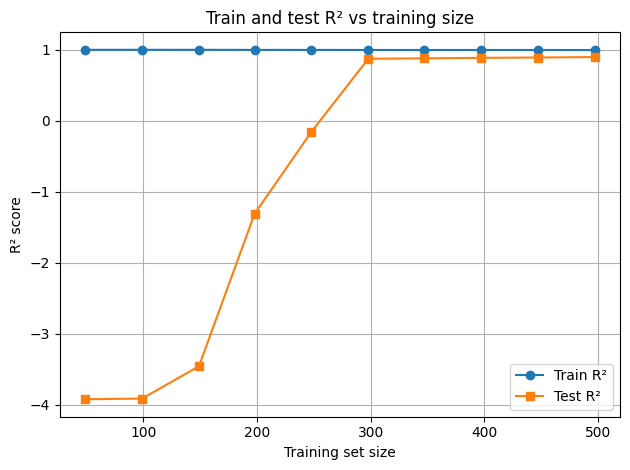

In [10]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib.pyplot
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_validate
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic, DotProduct
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score


# Import training data
training_data = pd.read_csv('steel.csv')
X_training = training_data[['normalising_temperature', 'tempering_temperature', 'percent_silicon', 'percent_chromium', 'percent_copper', 
                            'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese']]
Y_training = training_data['tensile_strength']
# print(X_training)
# print(Y_training)

# Choose error metrics:
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
}

depth = [None, 3, 5, 7, 9]
samples_to_split = [2,3,4,5,6]

# Train our model with the training data
regressor = GaussianProcessRegressor(random_state=0, alpha=100, kernel= 1.0 * RationalQuadratic())
model = make_pipeline(StandardScaler(), regressor)
kf = KFold(n_splits=10, shuffle=True, random_state=0)

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_training,
    Y_training,
    cv=kf,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=0
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, marker='o', label="Train R²")
plt.plot(train_sizes, test_mean, marker='s', label="Test R²")

plt.xlabel("Training set size")
plt.ylabel("R² score")
plt.title("Train and test R² vs training size")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()